# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm 
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [2]:
hf = pd.read_csv('kc_house_data_train.csv')
zipfile = "Zip_Codes-shp"
street_map = gpd.read_file(zipfile)
crs = {'init': 'epsg:4326'}

In [3]:
len(hf)

17290

In [4]:
hf

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [5]:
zip_grade = pd.read_csv('Niche.csv')
hf = zip_grade.set_index('zipcode').join(hf.set_index('zipcode'))


In [6]:
hf = hf.reset_index()

In [7]:
hf = hf.dropna(subset = ['id'])

In [8]:
hf['zipcode'].unique()

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 540739.55 and sigma = 373308.18



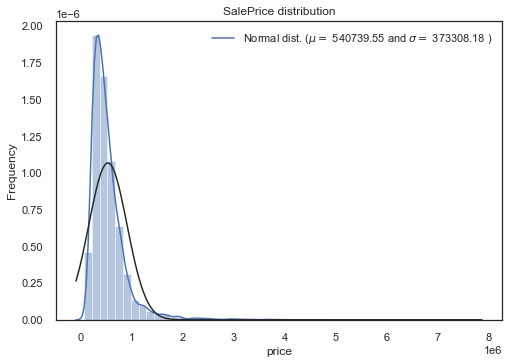

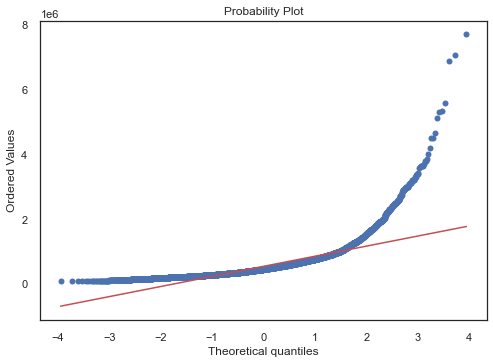

Skewness: 4.282599
Kurtosis: 38.520298


In [9]:
# Plot Histogram
sns.distplot(hf['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(hf['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(hf['price'], plot=plt)
plt.show()

print("Skewness: %f" % hf['price'].skew())
print("Kurtosis: %f" % hf['price'].kurt())

<AxesSubplot:>

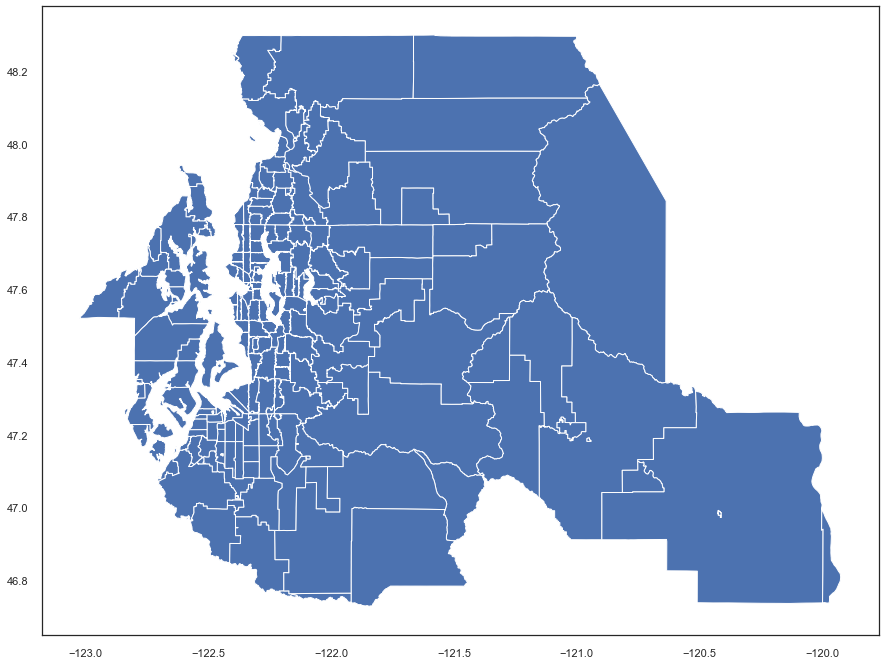

In [10]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [11]:
hf.columns

Index(['zipcode', 'zip_rank', 'niche_grade', 'school_grade', 'population',
       'Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
sqliv = hf.loc[hf['sqft_living'] <= 6850]
len(sqliv)

17260

In [13]:
sqlot = hf.loc[hf['sqft_lot'] <= 425000]
len(sqlot)

17260

In [14]:
floors = hf.loc[hf['floors'] <= 3.0]
len(floors)

17283

In [15]:
view = hf.loc[hf['view'] >= 3]
len(view)

680

In [16]:
cond = hf.loc[hf['condition'] >= 5 ]
len(cond)

1367

In [17]:
sqabove = hf.loc[hf['sqft_above'] <= 5800]
len(sqabove)

17260

In [18]:
sqliv15 = hf.loc[hf['sqft_living15'] <= 4820]
len(sqliv15)

17260

In [19]:
sqlot15 = hf.loc[hf['sqft_lot15'] <= 250000]
len(sqlot15)

17260

In [20]:
sqbase = hf.loc[hf['sqft_basement'] <= 2180]
len(sqbase)

17261

In [21]:
hf == 0

,zipcode,zip_rank,niche_grade,school_grade,population,Unnamed: 0,id,date,price,bedrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
17286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
17287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
17288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [22]:
hf[hf['bathrooms'] >= 5.5]

,zipcode,zip_rank,niche_grade,school_grade,population,Unnamed: 0,id,date,price,bedrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
792,98004,1,A+,A+,35034,8419,685000115,20141007T000000,2150000.0,8,...,3,8,4340,0,1967,0,47.6316,-122.202,2050,9100
807,98004,1,A+,A+,35034,9763,853200010,20140701T000000,3800000.0,5,...,4,13,4320,2730,1978,0,47.6229,-122.220,5070,20570
1072,98006,10,A+,A+,37769,1327,2424059170,20150219T000000,900000.0,5,...,3,12,5480,1640,2007,0,47.5451,-122.114,3440,36859
1200,98006,10,A+,A+,37769,7070,1778360150,20140620T000000,1240000.0,7,...,3,10,4930,1700,2004,0,47.5399,-122.118,4470,8639
1206,98006,10,A+,A+,37769,7183,6072800246,20140702T000000,3300000.0,5,...,3,11,8020,0,2001,0,47.5675,-122.189,4160,18969
1227,98006,10,A+,A+,37769,8021,3303850390,20141212T000000,2983000.0,5,...,3,13,6290,1110,2001,0,47.5431,-122.112,6110,26442
1410,98006,10,A+,A+,37769,16814,6065300370,20150506T000000,4208000.0,5,...,3,12,5550,1890,2003,0,47.5692,-122.189,4740,19329
2044,98014,66,B,A-,6911,4666,1125079111,20150415T000000,1600000.0,4,...,3,11,6530,0,2008,0,47.6640,-121.878,1280,858132
2983,98027,27,A,A+,30250,3168,2524069097,20140509T000000,2238890.0,5,...,3,12,6420,850,2010,0,47.5371,-121.982,1800,44890
5493,98039,20,A+,A+,3260,2232,2470100110,20140804T000000,5570000.0,5,...,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345


In [23]:
geometry = [Point(xy) for xy in zip(hf['long'], hf['lat'])]
geometry[:3]

In [24]:
geo_df = gpd.GeoDataFrame(hf,
                         crs = crs,
                         geometry = geometry)
geo_df.columns

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Index(['zipcode', 'zip_rank', 'niche_grade', 'school_grade', 'population',
       'Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

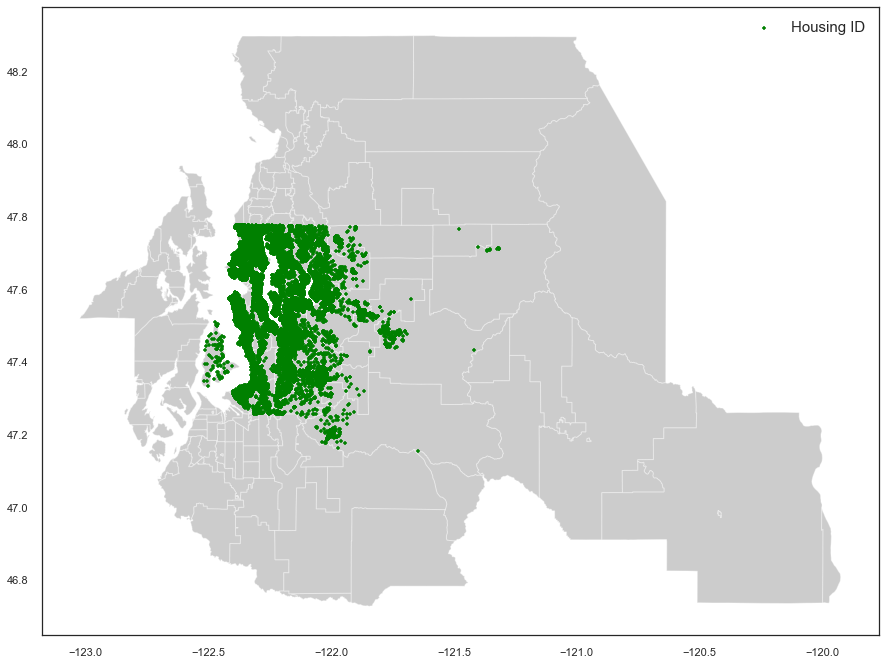

In [25]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
# geo_df[geo_df['Unnamed: 0'] >= 1000].plot(ax=ax, markersize = 20, color = 'blue', marker = "^", label = "Housing ID")
# geo_df[geo_df['Unnamed: 0'] <= 1000].plot(ax=ax, markersize = 20, color = 'red', marker = "o", label = "Housing ID")
geo_df[geo_df['price'] <= 7000000].plot(ax=ax, markersize = 20, color = 'green', marker = "+", label = "Housing ID")




plt.legend(prop={'size': 15})

In [26]:
hf.shape

(17290, 27)

In [27]:
hf[500:540]

,zipcode,zip_rank,niche_grade,school_grade,population,Unnamed: 0,id,date,price,bedrooms,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,geometry
500,98003,51,B+,B-,49860,4191,7212660640,20150326T000000,333000.0,4,...,8,2400,0,1993,0,47.2697,-122.312,2150,6584,POINT (-122.31200 47.26970)
501,98003,51,B+,B-,49860,4322,1822500160,20141212T000000,356500.0,4,...,8,2570,0,2008,0,47.2809,-122.296,2430,5997,POINT (-122.29600 47.28090)
502,98003,51,B+,B-,49860,4387,8155870200,20140522T000000,349900.0,4,...,8,2052,0,2014,0,47.2824,-122.295,2052,5250,POINT (-122.29500 47.28240)
503,98003,51,B+,B-,49860,4475,7203000200,20141212T000000,325000.0,3,...,7,1890,0,1966,0,47.3454,-122.314,1510,7560,POINT (-122.31400 47.34540)
504,98003,51,B+,B-,49860,4515,2329700440,20141027T000000,155000.0,3,...,7,970,0,1966,0,47.3284,-122.331,1230,8400,POINT (-122.33100 47.32840)
505,98003,51,B+,B-,49860,4623,5152700060,20140528T000000,465000.0,6,...,10,2150,2100,1967,0,47.3400,-122.327,3370,15983,POINT (-122.32700 47.34000)
506,98003,51,B+,B-,49860,4629,3392100050,20140625T000000,205000.0,3,...,6,1230,0,1965,0,47.3266,-122.334,1230,8750,POINT (-122.33400 47.32660)
507,98003,51,B+,B-,49860,4689,7575620750,20141222T000000,266000.0,3,...,8,1550,0,1989,0,47.3525,-122.304,1650,5627,POINT (-122.30400 47.35250)
508,98003,51,B+,B-,49860,4726,3321049112,20150222T000000,379900.0,4,...,8,3181,0,2014,0,47.2716,-122.297,2056,24393,POINT (-122.29700 47.27160)
509,98003,51,B+,B-,49860,4733,7212650990,20140721T000000,334950.0,4,...,8,2410,0,1992,0,47.2641,-122.312,2380,7914,POINT (-122.31200 47.26410)


In [28]:
hf.corr()

,zipcode,zip_rank,population,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,1.000000,0.062141,-0.052499,6.217517e-03,-0.008166,-0.048958,-0.147515,-0.201527,-0.195893,-0.126590,...,0.007068,-0.184946,-0.259745,0.079368,-0.348366,0.063641,0.264712,-0.563027,-0.273903,-0.145921
zip_rank,0.062141,1.000000,-0.160298,1.622775e-03,-0.037505,-0.470936,-0.089270,-0.168022,-0.185203,0.128930,...,-0.025318,-0.296743,-0.138332,-0.125637,0.062240,-0.029944,-0.673550,0.023502,-0.223040,0.141928
population,-0.052499,-0.160298,1.000000,-1.151257e-03,0.035476,-0.101279,0.016303,-0.057795,-0.091031,-0.153364,...,0.042208,-0.066886,-0.101441,0.000837,-0.034187,-0.027860,-0.017963,-0.212644,-0.097630,-0.181489
Unnamed: 0,0.006218,0.001623,-0.001151,1.000000e+00,-0.006139,-0.012306,-0.010271,-0.004940,-0.008900,-0.003500,...,-0.001781,-0.005015,-0.003406,-0.012104,0.007496,-0.003423,0.002470,-0.006992,-0.008961,0.000463
id,-0.008166,-0.037505,0.035476,-6.138777e-03,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,...,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.001865,0.017388,-0.007494,-0.139605
price,-0.048958,-0.470936,-0.101279,-1.230630e-02,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,...,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.147515,-0.089270,0.016303,-1.027127e-02,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,...,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.002170,0.124279,0.387589,0.026665
bathrooms,-0.201527,-0.168022,-0.057795,-4.939574e-03,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,...,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.195893,-0.185203,-0.091031,-8.900440e-03,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,...,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.126590,0.128930,-0.153364,-3.500101e-03,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,...,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.082029,0.226190,0.136959,0.701875


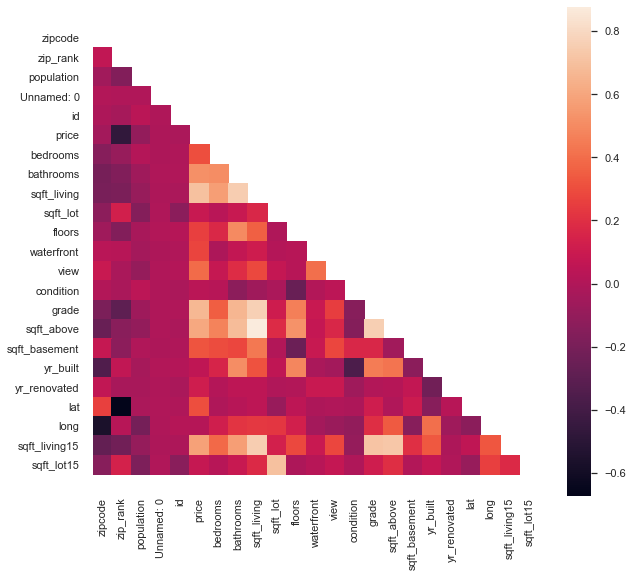

In [29]:
plt.style.use('seaborn')
sns.set(style="white")

# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(hf.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(hf.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [30]:
price_corr = hf[hf.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zip_rank        -0.470936
population      -0.101279
zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

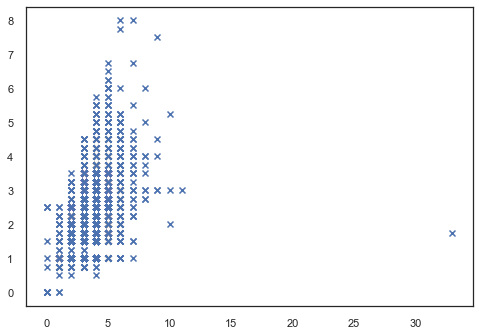

In [31]:
plt.scatter(hf['bedrooms'], hf['bathrooms'], marker ='x');

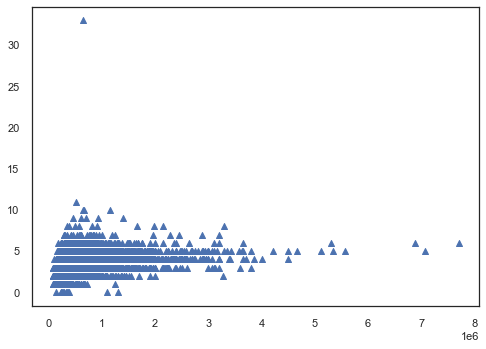

In [32]:
plt.scatter(hf['price'], hf['bedrooms'], marker = '^')

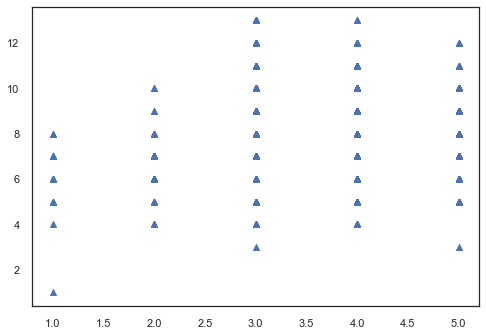

In [33]:
plt.scatter(hf['condition'], hf['grade'], marker = '^')

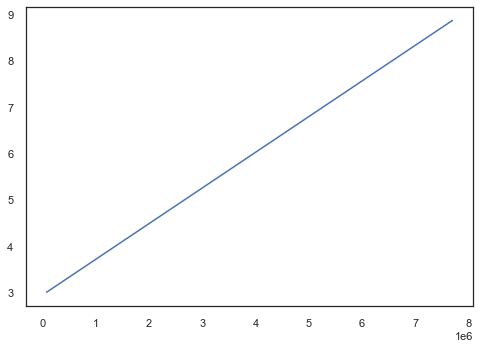

In [34]:
plt.plot(np.unique(hf['price']), np.poly1d(np.polyfit(hf['price'], hf['bedrooms'], 1))(np.unique(hf['price'])))

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bedrooms'>

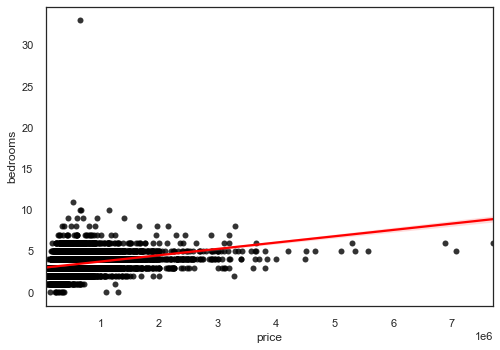

In [35]:

sns.regplot(hf['price'],hf['bedrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bathrooms'>

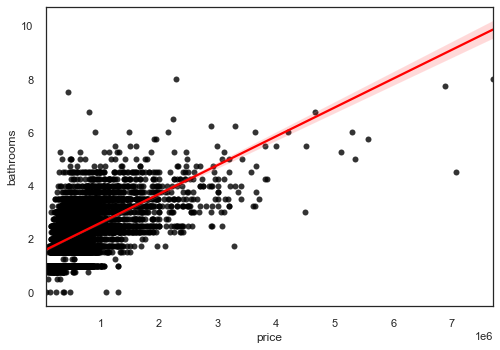

In [36]:
sns.regplot(hf['price'],hf['bathrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [37]:
hf[hf['sqft_living'] >= 12000]

,zipcode,zip_rank,niche_grade,school_grade,population,Unnamed: 0,id,date,price,bedrooms,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,geometry
6891,98053,25,A+,A+,22175,3275,1225069038,20140505T000000,2280000.0,7,...,12,9410,4130,1999,0,47.6675,-121.986,4850,217800,POINT (-121.98600 47.66750)
10166,98102,8,A+,A,25448,10366,6762700020,20141013T000000,7700000.0,6,...,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,POINT (-122.32300 47.62980)


In [38]:
hf['yr_renovated'].unique()

array([   0, 2007, 1982, 1979, 1957, 2009, 1983, 1993, 2001, 1967, 1981,
       2011, 1987, 1998, 1989, 2006, 2003, 2010, 2013, 1990, 1999, 2005,
       2008, 2002, 1985, 1995, 1992, 1997, 2014, 2015, 1977, 2004, 2000,
       1984, 1972, 1978, 1996, 1980, 1945, 1994, 1964, 1986, 1974, 1950,
       1991, 1962, 1988, 1976, 1975, 2012, 1970, 1958, 1953, 1965, 1968,
       1951, 1956, 1960, 1973, 1946, 1959, 1940, 1955, 1971, 1944, 1963,
       1948, 1969, 1934])

<function matplotlib.pyplot.show(close=None, block=None)>

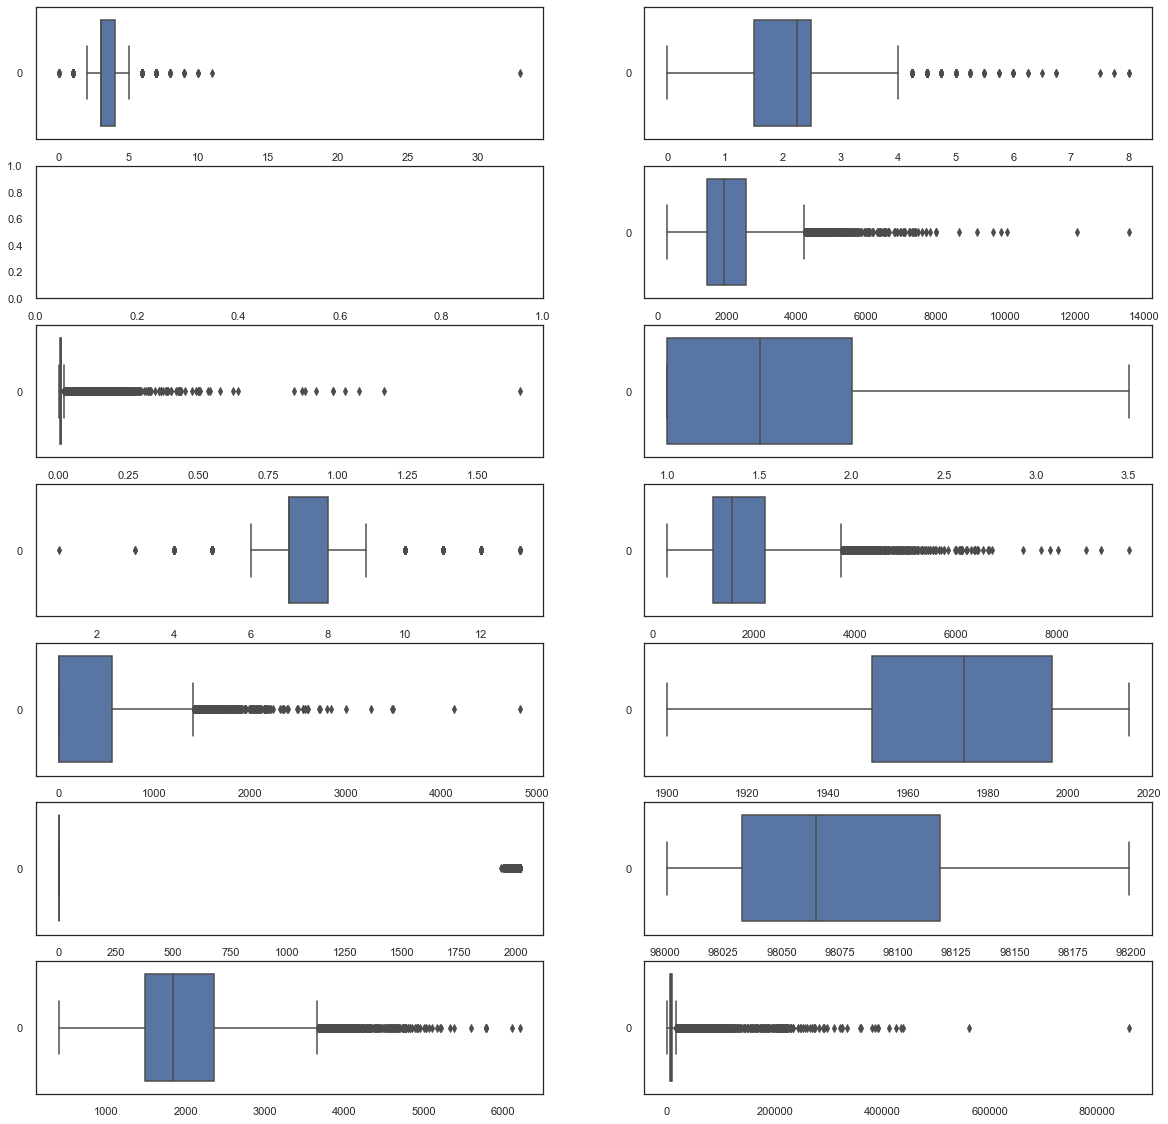

In [40]:
fig, axes = plt.subplots(7,2, figsize = (20, 20))


sns.boxplot(ax = axes[0,0], data = hf['bedrooms'], orient = 'h')
sns.boxplot(ax = axes[0,1], data = hf['bathrooms'], orient = 'h')
sns.boxplot(ax = axes[1,1], data = hf['sqft_living'], orient = 'h')
sns.boxplot(ax = axes[2,0], data = hf['sqft_lot'], orient = 'h')
sns.boxplot(ax = axes[2,1], data = hf['floors'], orient = 'h')
sns.boxplot(ax = axes[3,0], data = hf['grade'], orient = 'h')
sns.boxplot(ax = axes[3,1], data = hf['sqft_above'], orient = 'h')
sns.boxplot(ax = axes[4,0], data = hf['sqft_basement'], orient = 'h')
sns.boxplot(ax = axes[4,1], data = hf['yr_built'], orient = 'h')
sns.boxplot(ax = axes[5,0], data = hf['yr_renovated'], orient = 'h')
sns.boxplot(ax = axes[5,1], data = hf['zipcode'], orient = 'h')
sns.boxplot(ax = axes[6,0], data = hf['sqft_living15'], orient = 'h')
sns.boxplot(ax = axes[6,1], data = hf['sqft_lot15'], orient = 'h')


plt.show

In [41]:
hf.describe()

,zipcode,zip_rank,population,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,98078.193175,33.879179,34178.938230,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,...,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,47.560058,-122.214258,1987.986698,12873.475824
std,53.607949,19.533353,12365.309821,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,...,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,0.138412,0.140857,684.802635,27227.437583
min,98001.000000,1.000000,3260.000000,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,...,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,659.000000
25%,98033.000000,17.000000,25426.000000,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,...,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,98065.000000,33.000000,35028.000000,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,...,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,98118.000000,50.000000,43119.000000,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,...,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,47.677900,-122.126000,2360.000000,10101.750000
max,98199.000000,70.000000,67779.000000,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,...,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,858132.000000


In [42]:
a = hf.zipcode.unique()
hf['geometry']

0        POINT (-122.28400 47.26020)
1        POINT (-122.28300 47.30350)
2        POINT (-122.28200 47.33510)
3        POINT (-122.27000 47.27560)
4        POINT (-122.25700 47.27630)
                    ...             
17285    POINT (-122.39800 47.64930)
17286    POINT (-122.41200 47.64340)
17287    POINT (-122.40700 47.64730)
17288    POINT (-122.40400 47.63840)
17289    POINT (-122.38500 47.64400)
Name: geometry, Length: 17290, dtype: geometry

In [43]:
print(sorted(a))

[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]


In [44]:
hf.keys()

Index(['zipcode', 'zip_rank', 'niche_grade', 'school_grade', 'population',
       'Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

In [45]:
numerical = ['price', 'sqft_living', 'sqft_lot', 'view',
             'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'
    
]

categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'zipcode'
    
]

houses = hf[numerical + categorical]

houses.shape

(17290, 17)

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


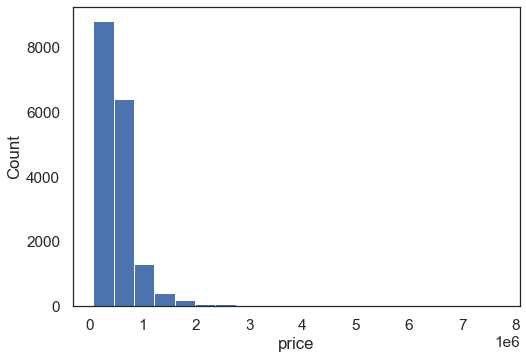

In [46]:
sns.set_context('notebook', font_scale = 1.4)

sns.distplot(
    hf['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='Count');

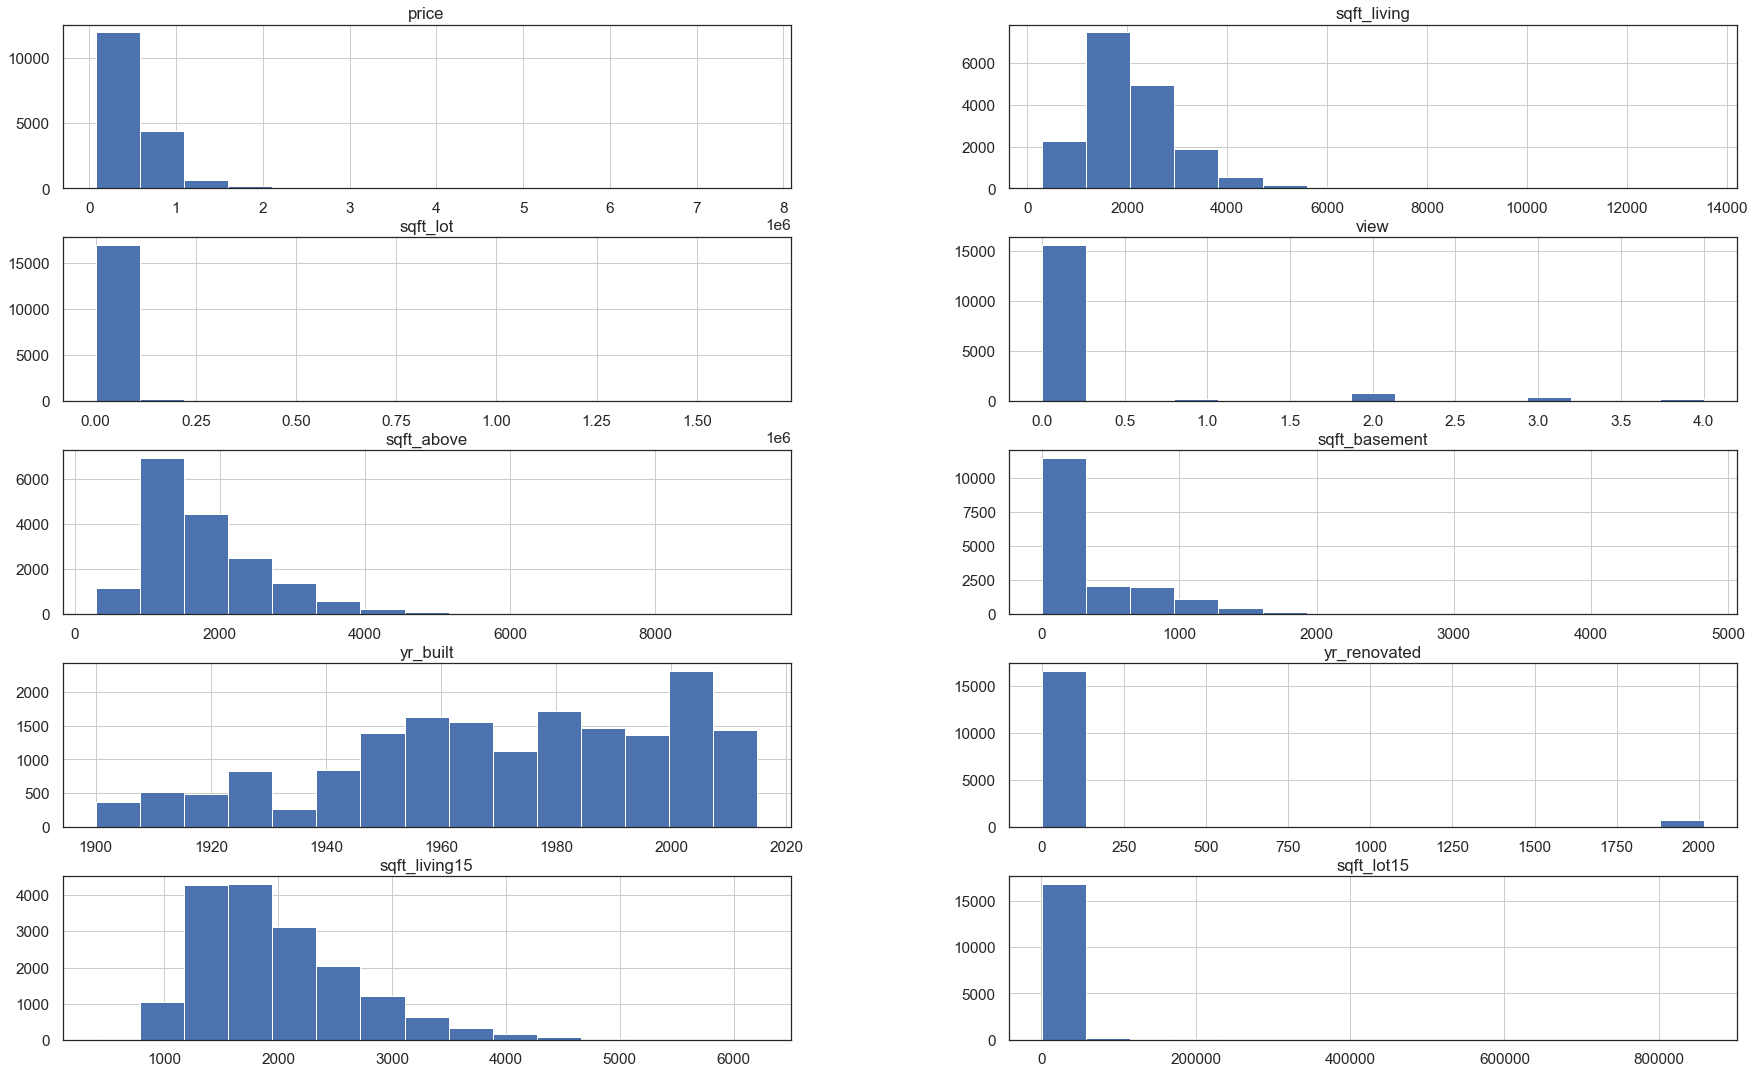

In [47]:
hf[numerical].hist(bins=15, figsize=(30, 50), layout=(13, 2));


/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

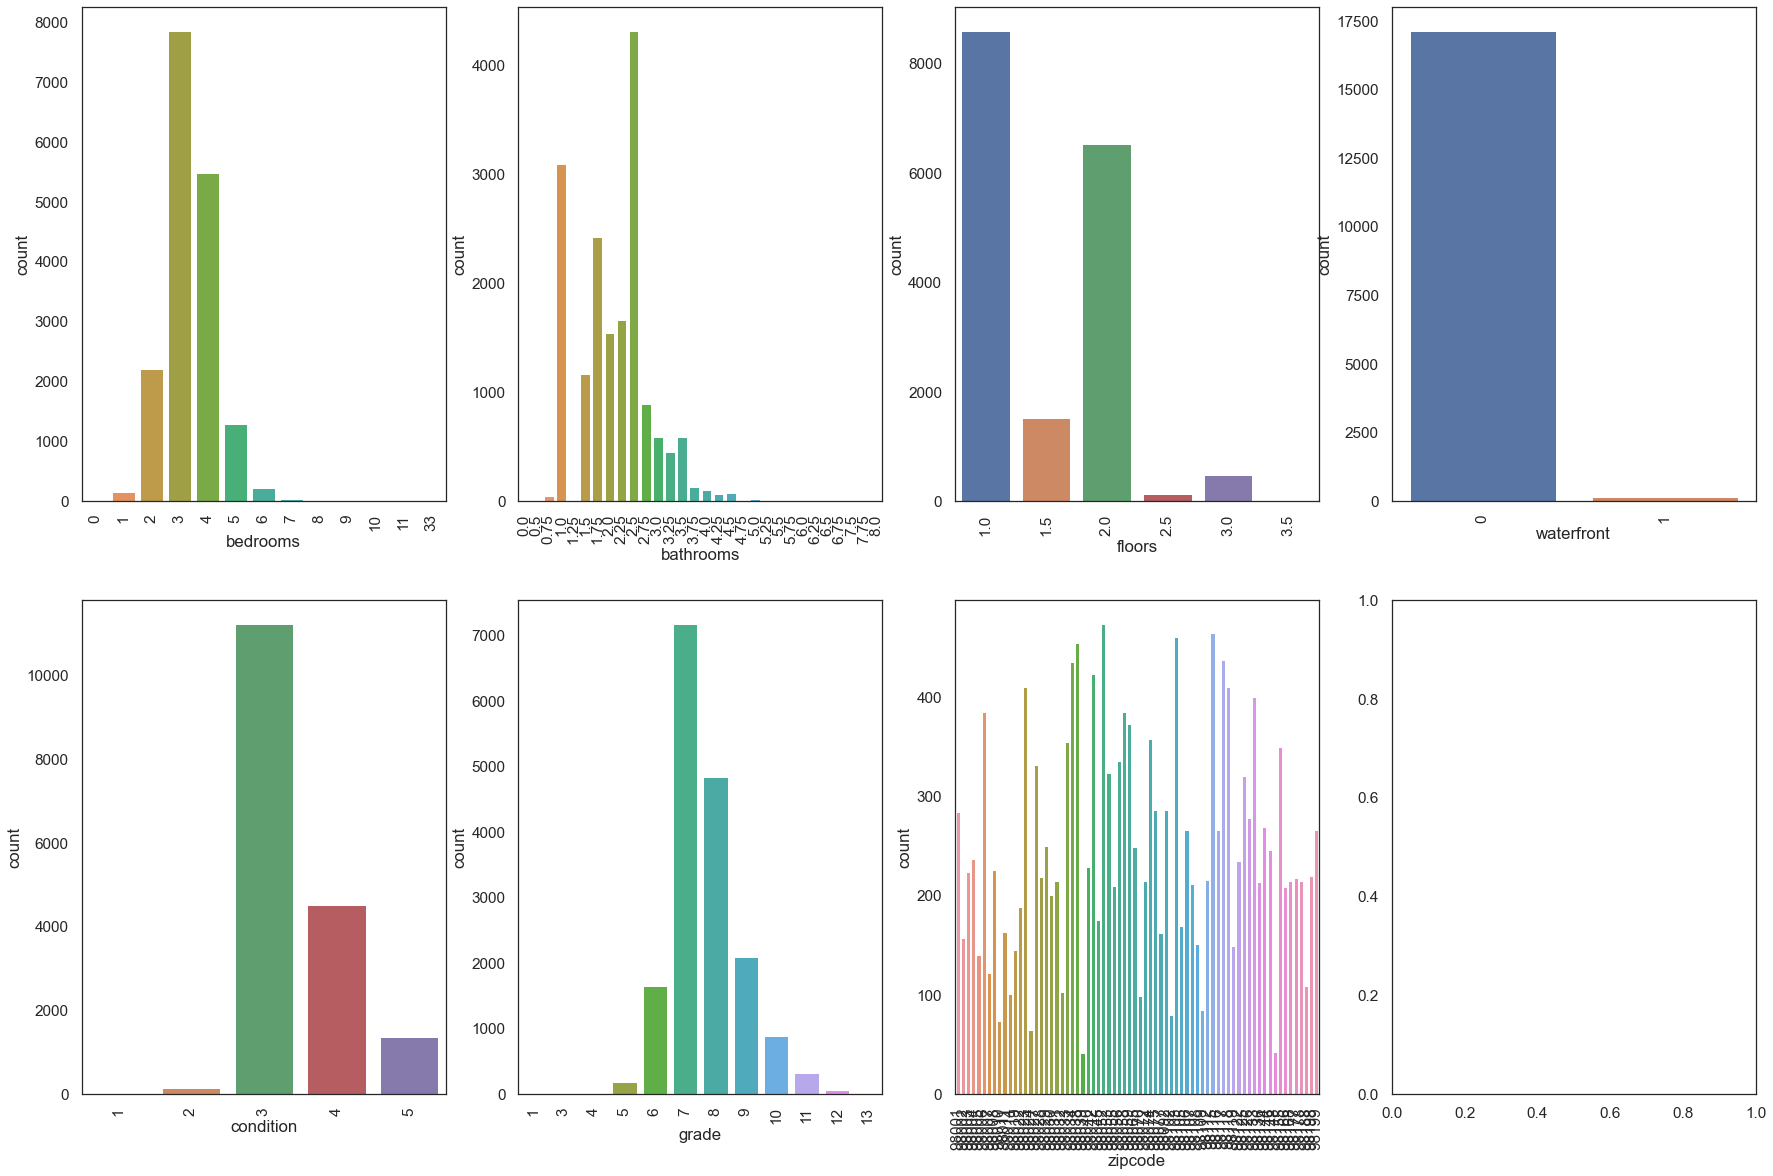

In [48]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(hf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

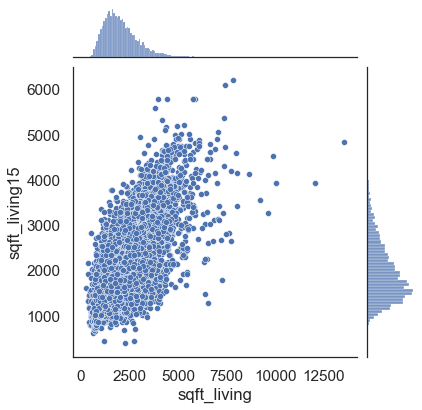

In [49]:
sns.jointplot(x=hf['sqft_living'], y=hf['sqft_living15']);


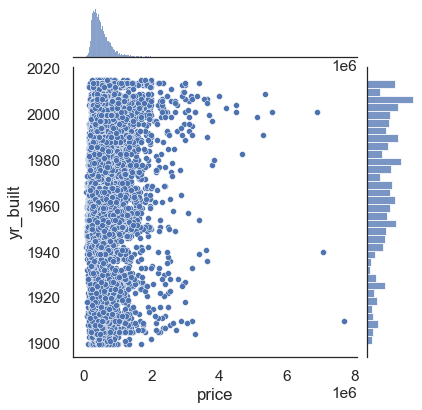

In [50]:
sns.jointplot(x=hf['price'], y=hf['yr_built']);


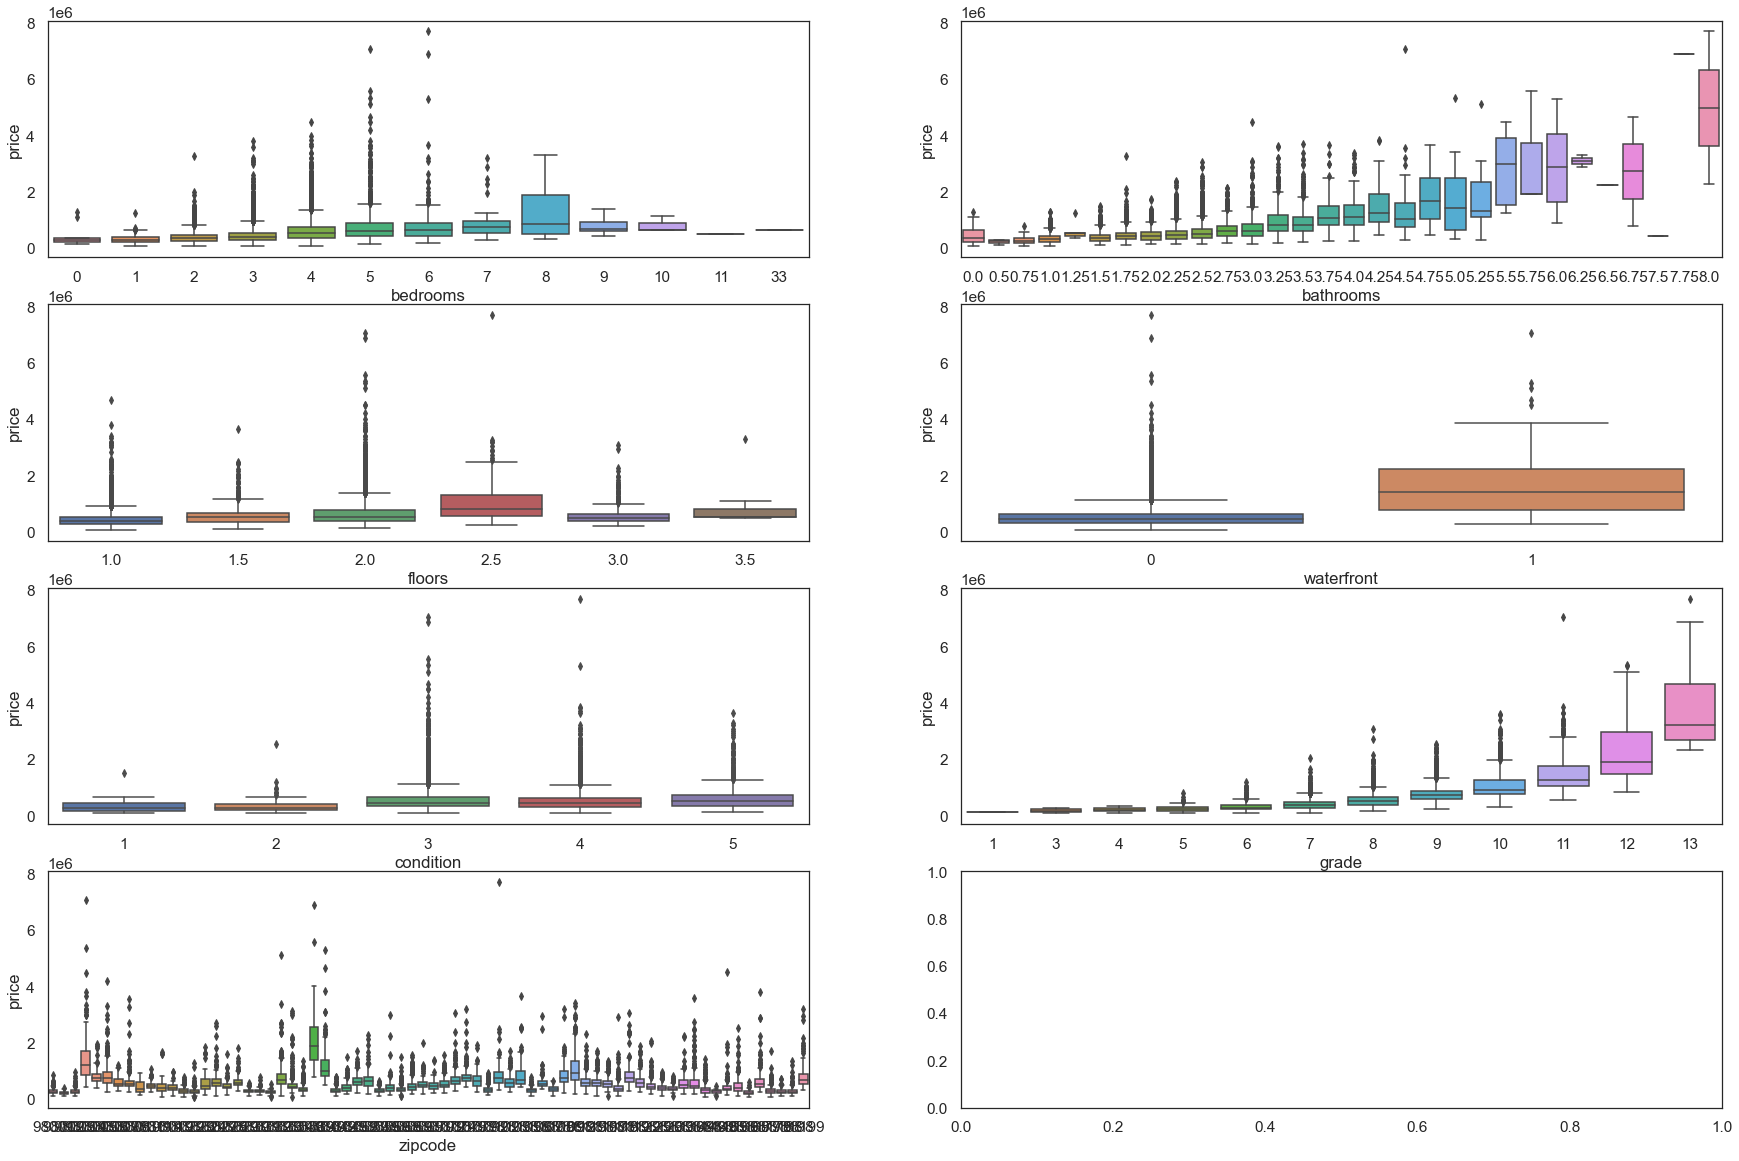

In [51]:

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=hf, ax=subplot)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

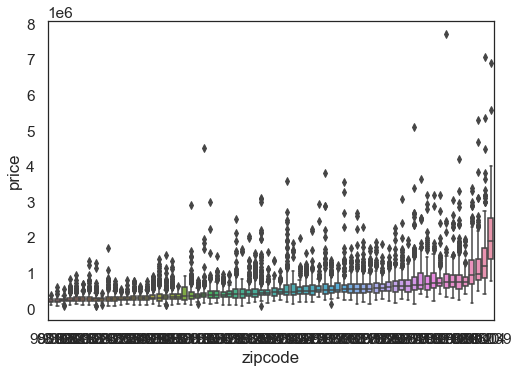

In [52]:
sorted_nb = hf.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=hf['zipcode'], y=hf['price'], order=list(sorted_nb.index))

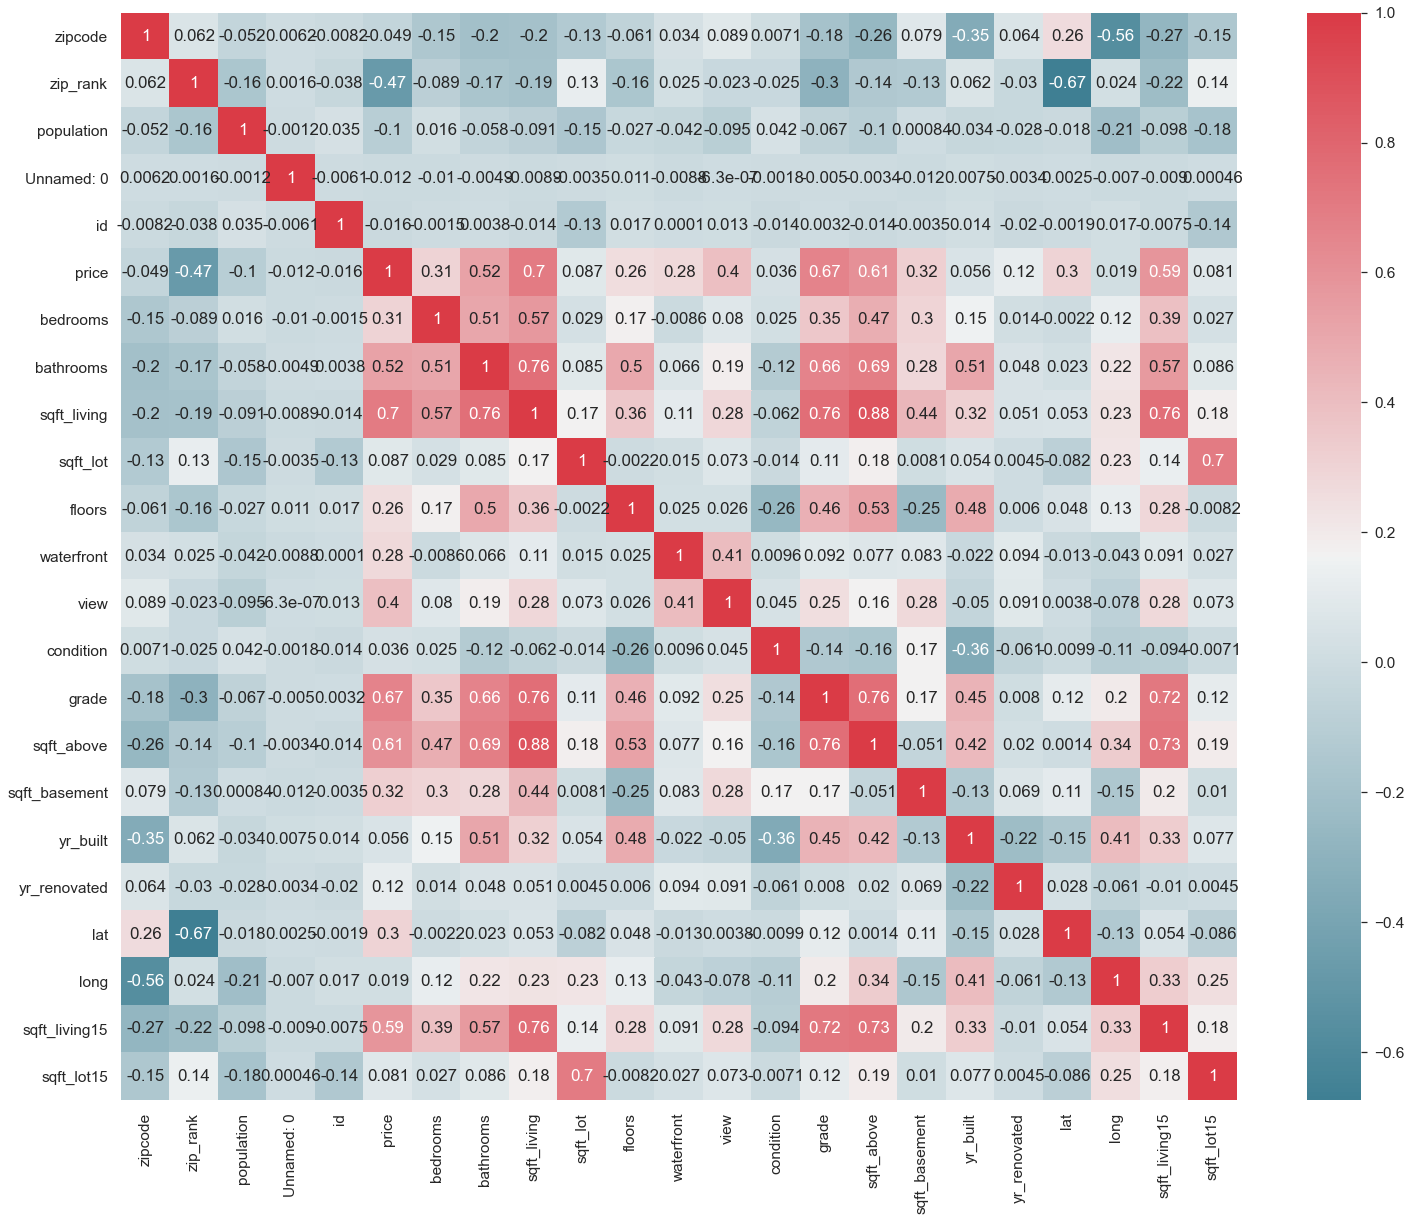

In [53]:
def correlation_heatmap(hf1):
    _,ax=plt.subplots(figsize=(25,20))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(hf.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(hf)

<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

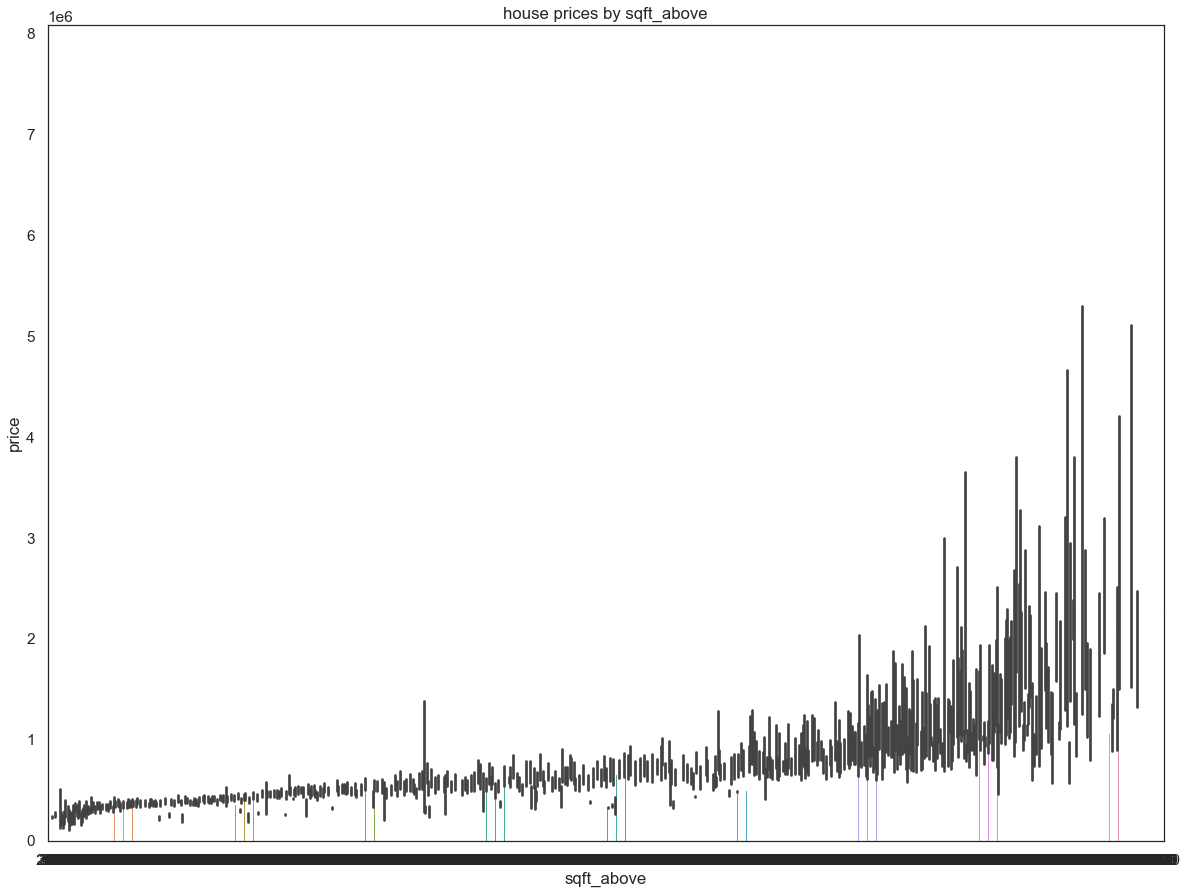

In [54]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,15))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=hf)

In [55]:
nobed = (hf['bedrooms'] == 0 )

In [56]:
hf[(hf['bathrooms'] == 2)]

#avgbathrooms = hf.loc[hf['bathrooms'] == 2].mean('bedrooms')
avgbathrooms =  hf.groupby(hf['bathrooms'] == 1)['bedrooms'].mean()
avgbathrooms[True]

2.6380645161290324

In [ ]:
avgbathrooms =  hf.groupby('bathrooms', as_index=False)['bedrooms'].mean()
avgbathrooms

In [ ]:
(hf['sqft_living'] == 0)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [58]:
sq_lot_mean = hf['sqft_lot'].mean()
sq_lot_std3 = hf['sqft_lot'].std()*3
sq_lot_mstd = sq_lot_mean + sq_lot_std3

sq_living_mean = hf['sqft_living'].mean()
sq_living_std3 = hf['sqft_living'].std()*3
sq_living_mstd = sq_living_mean + sq_living_std3

sq_above_mean = hf['sqft_above'].mean()
sq_above_std3 = hf['sqft_above'].std()*3
sq_above_mstd = sq_above_mean + sq_above_std3

sq_base_mean = hf['sqft_basement'].mean()
sq_base_std3 = hf['sqft_basement'].std()*3
sq_base_mstd = sq_base_mean + sq_base_std3

In [59]:
def cap_sqft(row):
    if row['sqft_lot'] > sq_lot_mstd:
        row['sqft_lot'] = sq_lot_mstd
    if row['sqft_living'] > sq_living_mstd:
        row['sqft_living'] = sq_living_mstd
    if row['sqft_above'] > sq_above_mstd :
        row['sqft_above'] = sq_above_mstd
    if row['sqft_basement'] > sq_base_mstd :
        row['sqft_basement'] = sq_base_mstd 
    return row

In [60]:
hf = hf.apply(cap_sqft, axis = 1)

In [61]:
hf.shape

(17290, 27)

In [62]:
def zero_val_bed_bath(row):
    """
    Checking extreame number of rooms in the house
    """
    if row['bedrooms'] == 0:
        row['bedrooms'] = row['floors']
    if row['bathrooms'] < 1:
        row['bathrooms'] = 1
    if row['bedrooms'] > 10 :
        row['bedrooms'] = 10
    return row

In [63]:
hf = hf.apply(zero_val_bed_bath, axis = 1)

In [64]:
hf.shape

(17290, 27)

In [65]:
hf.drop(columns = ['zip_rank', 'Unnamed: 0', 'id', 'view', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [66]:
def define_niche_grade(row):
    
    if row['niche_grade'] == 'A+':
        row['niche_grade'] = 1
    if row['niche_grade'] == 'A+ ':
        row['niche_grade'] = 1
    if row['niche_grade'] == 'A':
        row['niche_grade'] = 2
    if row['niche_grade'] == 'A-':
        row['niche_grade'] = 3
    if row['niche_grade'] == 'B+':
        row['niche_grade'] = 4
    if row['niche_grade'] == 'B':
        row['niche_grade'] = 5
    if row['niche_grade'] == 'B-':
        row['niche_grade'] = 6
    
    return row 

In [67]:
hf = hf.apply(define_niche_grade, axis = 1)

In [68]:
hf['niche_grade'].unique()

array([5, 4, 1, 2, 3, 6])

In [69]:
def define_school_grade(row):
    
    if row['school_grade'] == 'A+':
        row['school_grade'] = 1
    if row['school_grade'] == 'A+ ':
        row['school_grade'] = 1
    if row['school_grade'] == 'A ':
        row['school_grade'] = 2
    if row['school_grade'] == 'A':
        row['school_grade'] = 2
    if row['school_grade'] == 'A-':
        row['school_grade'] = 3
    if row['school_grade'] == 'A- ':
        row['school_grade'] = 3
    if row['school_grade'] == 'B+':
        row['school_grade'] = 4
    if row['school_grade'] == 'B':
        row['school_grade'] = 5
    if row['school_grade'] == 'B-':
        row['school_grade'] = 6
    if row['school_grade'] == 'C+':
        row['school_grade'] = 7
    
    return row 

In [70]:
hf = hf.apply(define_school_grade, axis = 1)

In [71]:
hf['school_grade'].unique()

array([6, 5, 1, 4, 3, 2, 7])

In [72]:
hf.shape

(17290, 21)

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [73]:
hf['yr_updated'] = np.nan

In [74]:
def yr_update(row):
    
    if row['yr_renovated'] == 0:
        row['yr_updated'] = 2021 - row['yr_built']
    if row['yr_renovated'] != 0:
        row['yr_updated'] = 2021 - row['yr_built']
        
    return row 
    

In [75]:
hf = hf.apply(yr_update, axis = 1)

In [76]:
hf['percent_bedbath'] = np.nan
hf['has_golden_ratio'] = np.nan

In [77]:
# Based off of bathrooms pros and housetipster 

def ratio_bed_bath(row):
    
    ratio_bed_bath = row['bathrooms'] / row['bedrooms']
    golden_ratio = (2/3)
    row['percent_bedbath'] = abs(golden_ratio - ratio_bed_bath) 
    
    return row

In [78]:
hf = hf.apply(ratio_bed_bath, axis = 1)

In [79]:
def cal_ratio_range(row):
    golden_ratio = (2/3)
    golden_ratio_plus = golden_ratio + (golden_ratio * .10)
    golden_ratio_minus = golden_ratio - (golden_ratio * .10)
    
    if row['percent_bedbath'] <= golden_ratio_plus and row['percent_bedbath'] >= golden_ratio_minus:
            row['has_golden_ratio'] = 1
    else:
        row['has_golden_ratio'] = 0
    
    return row

In [80]:
hf = hf.apply(cal_ratio_range, axis = 1)

In [81]:
hf['ratio_liv_lot'] = np.nan

In [82]:
def ratio_living_lot(row):
    
    row['ratio_liv_lot'] = row['sqft_lot'] / row['sqft_living']
    return row
    

In [83]:
hf = hf.apply(ratio_living_lot, axis = 1)

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [84]:
hf = pd.concat([hf, pd.get_dummies(hf['zipcode'])], 1)

In [85]:
hf = hf.drop(columns = 'zipcode')

In [86]:
# your code here
# dummy variable for grade 
#

In [87]:
hf = pd.concat([hf, pd.get_dummies(hf['grade'])], 1)

In [88]:
hf = hf.drop(columns = 'grade')

In [89]:
hf.columns = hf.columns.astype(str)

In [90]:
# lowest g: 1
# low g: 3 Falls short of minimum building standards. Normally cabin or inferior structure.

# dnmc: 4 Generally older, low quality construction. Does not meet code.

# poor: 5 Low construction costs and workmanship. Small, simple design.

# bare_min: 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

# average: 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

# above_avg: 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

# good: 9 Better architectural design with extra interior and exterior design and quality.

# high_qua: 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

# higher_qua: 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

# excellent qua: 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

# mansion: 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [91]:
hf = hf.rename(columns={'1': 'lowest_g', '3': 'low_g', '4':'dnmc', '5':'Poor', '6':'bare_min', 
                   '7':'average', '8':'above_avg', '9':'good', '10':'high_qua', '11':'higher_qua',
                   '12':'excellent_qua', '13':'mansion' })

In [92]:
hf.columns[60:100]

Index(['98074', '98075', '98077', '98092', '98102', '98103', '98105', '98106',
       '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118',
       '98119', '98122', '98125', '98126', '98133', '98136', '98144', '98146',
       '98148', '98155', '98166', '98168', '98177', '98178', '98188', '98198',
       '98199', 'lowest_g', 'low_g', 'dnmc', 'Poor', 'bare_min', 'average',
       'above_avg'],
      dtype='object')

In [93]:
features = ['niche_grade', 'school_grade', 'bathrooms', 'population', 'yr_renovated', 'population',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'yr_updated', 'percent_bedbath', 'has_golden_ratio', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion', '98001', '98002', 
       '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
       '98108', '98109', '98112', '98115', '98116', '98117',
       '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
       '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
       '98198', '98199']

hf_features = hf[features]
target = hf['price']

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [94]:
# your code here
hf['date'] = pd.to_datetime(hf['date'], format = '%Y/%m/%d')

In [96]:
hf.columns = hf.columns.astype(str)

In [ ]:
hf.columns

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [97]:
features = ['niche_grade', 'yr_updated', 'ratio_liv_lot']

hf_features = hf[features]
target = hf['price']

In [98]:
# your code here
poly = PolynomialFeatures(degree=2, include_bias=False)

In [99]:
poly_data = poly.fit_transform(hf_features)

In [100]:
poly_columns = poly.get_feature_names(hf_features.columns)

In [101]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [102]:
df_poly.columns

Index(['niche_grade', 'yr_updated', 'ratio_liv_lot', 'niche_grade^2',
       'niche_grade yr_updated', 'niche_grade ratio_liv_lot', 'yr_updated^2',
       'yr_updated ratio_liv_lot', 'ratio_liv_lot^2'],
      dtype='object')

In [103]:
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

In [104]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly, target, random_state=34,test_size=0.2)


In [105]:
#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)

In [106]:
train_preds = lr_poly.predict(X_train_poly)

In [107]:
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly, train_preds))

print('Root Mean Squared Error:' , train_rmse_poly)

Root Mean Squared Error: 323005.60230211547


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [108]:
# your code here
# waterfront times sqft_lot
hf = pd.concat([hf, pd.get_dummies(hf['waterfront'])], 1)

In [109]:
hf = hf.rename(columns={0: "No_Waterfront", 1: "Waterfront"})

In [110]:
hf['water_sqft_lot'] = np.nan

In [111]:
def water_lot(row):
    if row['waterfront'] == 1:
        row['water_sqft_lot'] = row['Waterfront'] * row['sqft_lot'] 
    if row['waterfront'] == 0:
        row['water_sqft_lot'] = 0
    return row

In [112]:
hf = hf.apply(water_lot, axis=1)

In [113]:
hf = hf.drop(columns='waterfront')

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [114]:
hf.columns

Index(['niche_grade', 'school_grade', 'population', 'date', 'price',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       ...
       'average', 'above_avg', 'good', 'high_qua', 'higher_qua',
       'excellent_qua', 'mansion', 'No_Waterfront', 'Waterfront',
       'water_sqft_lot'],
      dtype='object', length=107)

In [226]:
features = ['school_grade', 'population', 
             'bedrooms', 'bathrooms', 
            'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 
            'sqft_basement', 'yr_built', 'yr_renovated', 'yr_updated', 
            'percent_bedbath','has_golden_ratio', 'lowest_g','low_g', 'dnmc', 'Poor', 
            'bare_min', 'average', 'above_avg', 'good', 'high_qua', 'higher_qua', 
            'excellent_qua', 'mansion', 'No_Waterfront',  'Waterfront', 'water_sqft_lot',
            '98001', '98002', '98003', '98004', '98005', '98006',
           '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
           '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
           '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
           '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
           '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
           '98108', '98109', '98112', '98115', '98116', '98117',
           '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
           '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
           '98198', '98199']

hf_features = hf[features]
target = hf['price']

### 5.1) Perform a train-test split of the data.

In [227]:
def model_test(df, features, target):
    df_features = df[features]
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)
    #instantiate a linear regression object
    lm = linear_model.LinearRegression()

    #fit the linear regression to the data
    lm = lm.fit(X_train, y_train)
    
    y_train_pred = lm.predict(X_train)
    
    train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
    train_mse = metrics.mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
   
    # Test Set
    y_pred = lm.predict(X_test)
    
    #test_mae = metrics.mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    #print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
    #print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [228]:
model_test(hf, features, target)

Training:  159954 vs. Testing:  155376


### 5.2) Fit your scaler to training the data.

In [229]:
scale_df = pd.concat([hf[features], df_poly], 1)

In [230]:
scale_df.shape

(17290, 109)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(scale_df, target, random_state=34,test_size=0.2)

In [232]:
X_train.select_dtypes(include=["number"]).columns

Index(['school_grade', 'population', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       ...
       '98199', 'niche_grade', 'yr_updated', 'ratio_liv_lot', 'niche_grade^2',
       'niche_grade yr_updated', 'niche_grade ratio_liv_lot', 'yr_updated^2',
       'yr_updated ratio_liv_lot', 'ratio_liv_lot^2'],
      dtype='object', length=109)

In [233]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
scaled_data = scaler.transform(X_train)

In [234]:
X_train_scaled = pd.DataFrame(data=scaled_data, columns=X_train.columns, index=X_train.index)

### 5.3) Transform the testing set with the scaler.

In [235]:
#your code here 
scaled_test_data = scaler.transform(X_test)

In [236]:
X_test_scaled = pd.DataFrame(data=scaled_test_data, columns=X_test.columns, index=X_test.index)

### 5.4) Fit the model to the training data.

In [237]:
#your code here 
#your code here 
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

### 5.5) Use the model to predict on the training set and the test set.

In [238]:
#your code here 
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [239]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 158630.52210645188
Test Root Mean Squared Error: 153801.51307687437


### 5.7) Determine if your model is overfit.

In [240]:
model_percent = round(((train_rmse - test_rmse)/(train_rmse))*100, 2)

In [241]:
print("{}% difference".format(model_percent))

3.04% difference


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [242]:
# your code here
#F-test
X_train.shape

(13832, 109)

In [243]:
selector = SelectKBest(f_regression, k=70)

selector.fit(X_train, y_train)

SelectKBest(k=70, score_func=<function f_regression at 0x7fd3f45f0160>)

In [244]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [245]:
list(removed_columns)

['condition',
 'percent_bedbath',
 'lowest_g',
 'low_g',
 'dnmc',
 'above_avg',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98024',
 '98027',
 '98028',
 '98029',
 '98034',
 '98045',
 '98052',
 '98056',
 '98059',
 '98065',
 '98070',
 '98072',
 '98103',
 '98107',
 '98115',
 '98116',
 '98117',
 '98122',
 '98125',
 '98126',
 '98136',
 '98144',
 '98148',
 '98166',
 '98177',
 'yr_updated^2',
 'ratio_liv_lot^2']

In [246]:
list(selected_columns)

['school_grade',
 'population',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'yr_updated',
 'has_golden_ratio',
 'Poor',
 'bare_min',
 'average',
 'good',
 'high_qua',
 'higher_qua',
 'excellent_qua',
 'mansion',
 'No_Waterfront',
 'Waterfront',
 'water_sqft_lot',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98022',
 '98023',
 '98030',
 '98031',
 '98032',
 '98033',
 '98038',
 '98039',
 '98040',
 '98042',
 '98053',
 '98055',
 '98058',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98105',
 '98106',
 '98108',
 '98109',
 '98112',
 '98118',
 '98119',
 '98133',
 '98146',
 '98155',
 '98168',
 '98178',
 '98188',
 '98198',
 '98199',
 'niche_grade',
 'yr_updated',
 'ratio_liv_lot',
 'niche_grade^2',
 'niche_grade yr_updated',
 'niche_grade ratio_liv_lot',
 'yr_updated ratio_liv_lot']

In [247]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 164260.8708047078
Testing Root Mean Squared Error: 159298.30119203287


In [248]:
a = round((testK_rmse - trainK_rmse)/ (trainK_rmse)*100,2)

In [249]:
a

-3.02

In [250]:
#REFECV
from sklearn.feature_selection import RFECV

In [251]:
ols = linear_model.LinearRegression()

In [252]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_absolute_error', step=2, verbose=1)

In [253]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [254]:
selected_rfe

Index(['school_grade', 'population', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       ...
       '98199', 'niche_grade', 'yr_updated', 'ratio_liv_lot', 'niche_grade^2',
       'niche_grade yr_updated', 'niche_grade ratio_liv_lot', 'yr_updated^2',
       'yr_updated ratio_liv_lot', 'ratio_liv_lot^2'],
      dtype='object', length=109)

In [255]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)



Training Root Mean Squared Error: 158630.52216827497
Testing Root Mean Squared Error: 153801.49639896394


In [256]:
b = round((testRFE_rmse - trainRFE_rmse)/ (trainRFE_rmse)*100,2)

In [164]:
b 

23.5

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [223]:
effect_feat = ['school_grade',  
               'population',  
               'bedrooms', 
               'bathrooms', 
               'sqft_living', 
               'sqft_lot', 
               'floors', 
               'condition', 
               'sqft_above', 
               'sqft_basement',
               'yr_built', 
               'yr_renovated', 
               'yr_updated', 
               'percent_bedbath',
               'has_golden_ratio', 
               'lowest_g', 
               'dnmc', 
               'Poor', 
               'bare_min', 
               'average', 
               'above_avg', 
               'good', 
               'high_qua', 
               'higher_qua', 
               'excellent_qua',
               'mansion', 
               'No_Waterfront',  
               'Waterfront', 
               'water_sqft_lot',
            '98001', '98002', '98003', '98004', '98005', '98006',
           '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
           '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
           '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
           '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
           '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
           '98108', '98109', '98112', '98115', '98116', '98117',
           '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
           '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
           '98198', '98199']

In [166]:
model_test(scale_df, effect_feat, target)

Training:  159954 vs. Testing:  155376


In [224]:
final_hf = scale_df[effect_feat]

## Step 7: Evaluate your different models in order to determine the best model overall.

In [151]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(floors)'
lm_condition = smf.ols(formula, hf).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The number of floors has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The number of floors has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


In [152]:
is_waterfront = hf[(hf['Waterfront'] == 1)]
waterfront_price = is_waterfront.price
no_waterfront = hf[(hf['Waterfront'] == 0)]
notwaterfront_price = no_waterfront.price
alpha = 0.05
waterfront_p_val = stats.ttest_ind(waterfront_price, notwaterfront_price, equal_var=False)[1]
print("Waterfront vs No Waterfront T-test P Value: ", waterfront_p_val)
if waterfront_p_val < alpha:
    print("The P value is less than alpha, reject null-hypothesis")

Waterfront vs No Waterfront T-test P Value:  6.940441256090488e-23
The P value is less than alpha, reject null-hypothesis


In [153]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(bedrooms)'
lm_condition = smf.ols(formula, hf).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The number of bedrooms has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The number of bedrooms has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


## Step 8:  Refit your best model to the entire dataset.

In [168]:
scale_df.columns

Index(['school_grade', 'bathrooms', 'population', 'yr_renovated', 'population',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       ...
       '98199', 'niche_grade', 'yr_updated', 'ratio_liv_lot', 'niche_grade^2',
       'niche_grade yr_updated', 'niche_grade ratio_liv_lot', 'yr_updated^2',
       'yr_updated ratio_liv_lot', 'ratio_liv_lot^2'],
      dtype='object', length=112)

In [169]:
scaler = StandardScaler()

In [170]:
scaler.fit(final_hf)

StandardScaler()

In [171]:
scaled_data = scaler.transform(final_hf)

In [172]:
hf_features_scaled = pd.DataFrame(data=final_hf[selected_columns], columns=final_hf.columns, index=final_hf.index)

In [192]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(scale_df[selected_columns], hf['price'])

In [193]:
lm.coef_

array([ 1.78112948e+04,  1.57280987e+13, -1.63015631e+12, -1.89565613e+13,
        1.00569945e+13,  1.22086201e+11, -2.86428513e+11, -4.19694411e+11,
        9.31926118e+12, -1.40935495e+04, -6.51708873e+12, -7.58085358e+12,
       -1.78084473e+02, -6.13281250e-01, -8.97177695e+03,  3.24636719e+02,
        3.14720703e+02, -5.85123196e+09,  8.21778302e+10,  8.21644819e+10,
        2.92457600e+10,  2.92957804e+10,  1.63131111e+05, -9.36708440e+04,
       -6.52350269e+04, -4.50995618e+04,  9.65738958e+04,  2.44950725e+05,
        4.88212481e+05,  1.06274439e+06,  2.42450397e+06,  1.30575727e+07,
        1.38284002e+07,  5.08789062e-01, -9.29164674e+04, -5.82410498e+04,
       -1.07520224e+05,  5.17924108e+05,  2.91126782e+04,  1.26165225e+04,
       -8.63271596e+04, -1.35410283e+05, -6.70062982e+04, -4.72845468e+04,
       -1.00281101e+05,  1.09240834e+05, -2.50298843e+04,  1.01374892e+06,
        2.51030034e+05, -5.84675014e+04, -3.49616079e+04, -6.95098803e+04,
       -5.84149232e+04, -

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [194]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

# pickle_out = open('scaler.pickle', "wb")
# pickle.dump(scaler, pickle_out)
# pickle_out.close()

In [259]:
selected_columns

Index(['school_grade', 'population', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'yr_updated', 'has_golden_ratio', 'Poor', 'bare_min',
       'average', 'good', 'high_qua', 'higher_qua', 'excellent_qua', 'mansion',
       'No_Waterfront', 'Waterfront', 'water_sqft_lot', '98001', '98002',
       '98003', '98004', '98005', '98006', '98022', '98023', '98030', '98031',
       '98032', '98033', '98038', '98039', '98040', '98042', '98053', '98055',
       '98058', '98074', '98075', '98077', '98092', '98102', '98105', '98106',
       '98108', '98109', '98112', '98118', '98119', '98133', '98146', '98155',
       '98168', '98178', '98188', '98198', '98199', 'niche_grade',
       'yr_updated', 'ratio_liv_lot', 'niche_grade^2',
       'niche_grade yr_updated', 'niche_grade ratio_liv_lot',
       'yr_updated ratio_liv_lot'],
      dtype='object')

In [258]:
list(selected_rfe)

['school_grade',
 'population',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'yr_updated',
 'percent_bedbath',
 'has_golden_ratio',
 'lowest_g',
 'low_g',
 'dnmc',
 'Poor',
 'bare_min',
 'average',
 'above_avg',
 'good',
 'high_qua',
 'higher_qua',
 'excellent_qua',
 'mansion',
 'No_Waterfront',
 'Waterfront',
 'water_sqft_lot',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',